In [ ]:
pip install cnt

     |████████████████████████████████| 81kB 4.0MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.1.8-cp37-cp37m-linux_x86_64.whl size=61403 sha256=049f9e103cda94ba0d4d076a997ab4a980f04bf5b0616a54aa5edbb22c3b8bc6
  Stored in directory: /root/.cache/pip/wheels/71/09/03/3c8a49641342e11e8cee29ffd9a21ff62bb2b3df1890a8fea4
Successfully built pyahocorasick


In [ ]:
pip install mne

     |████████████████████████████████| 7.0MB 5.3MB/s 


In [ ]:
import cnt
import mne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import io
from mne.datasets import sample
from mne.io import read_raw_cnt
from google.colab import files
from mne.stats import permutation_t_test
from mne.io import concatenate_raws, read_raw_cnt
import os.path as op
import os

In [ ]:
uploaded = files.upload()

Saving jx.cnt to jx.cnt
Saving zd.cnt to zd.cnt


In [ ]:
# Normal veriler : 
ajx = mne.io.read_raw_cnt("jx.cnt", preload=True,data_format="int32")
df1 = ajx.copy() 

<ipython-input-5-02ec97043d1c>:2: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  ajx = mne.io.read_raw_cnt("jx.cnt", preload=True,data_format="int32")


Reading 0 ... 300759  =      0.000 ...   300.759 secs...


In [ ]:
# Yorgunluk verileri :
azd = mne.io.read_raw_cnt("zd.cnt", preload=True,data_format="int32")
df2 = azd.copy() 

Reading 0 ... 300559  =      0.000 ...   300.559 secs...


<ipython-input-6-3202105b75dd>:2: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  azd = mne.io.read_raw_cnt("zd.cnt", preload=True,data_format="int32")


In [ ]:
mpath =r'C:\Users\x\Desktop\Theoriginaldata\maleS1'


In [ ]:
os.PathLike = uploaded


In [ ]:
data_path = op.join(uploaded)


TypeError: ignored

In [ ]:
df1.info

<Info | 8 non-empty values
 bads: []
 ch_names: HEOL, HEOR, FP1, FP2, VEOU, VEOL, F7, F3, FZ, F4, F8, FT7, FC3, ...
 chs: 40 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 40
 projs: []
 sfreq: 1000.0 Hz
 subject_info: 5 items (dict)
>

In [ ]:
df2.info

<Info | 8 non-empty values
 bads: []
 ch_names: HEOL, HEOR, FP1, FP2, VEOU, VEOL, F7, F3, FZ, F4, F8, FT7, FC3, ...
 chs: 40 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 40
 projs: []
 sfreq: 1000.0 Hz
 subject_info: 5 items (dict)
>

In [ ]:
df1.ch_names

['HEOL',
 'HEOR',
 'FP1',
 'FP2',
 'VEOU',
 'VEOL',
 'F7',
 'F3',
 'FZ',
 'F4',
 'F8',
 'FT7',
 'FC3',
 'FCZ',
 'FC4',
 'FT8',
 'T3',
 'C3',
 'CZ',
 'C4',
 'T4',
 'TP7',
 'CP3',
 'CPZ',
 'CP4',
 'TP8',
 'A1',
 'T5',
 'P3',
 'PZ',
 'P4',
 'T6',
 'A2',
 'O1',
 'OZ',
 'O2',
 'FT9',
 'FT10',
 'PO1',
 'PO2']

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


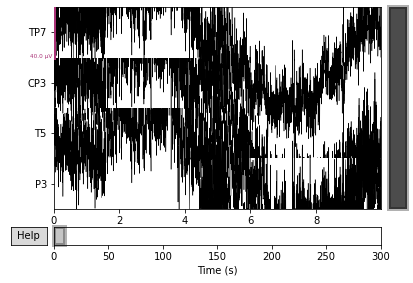

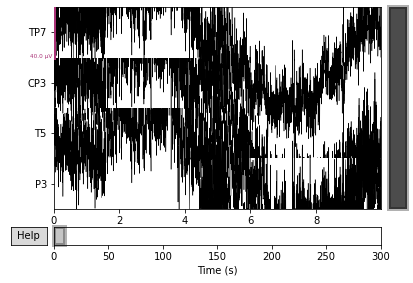

In [ ]:
# Yorgunluğun görüldüğü kanallar 
df1.pick_channels(ch_names=["TP7", "CP3", "T5", "P3"]).plot()

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


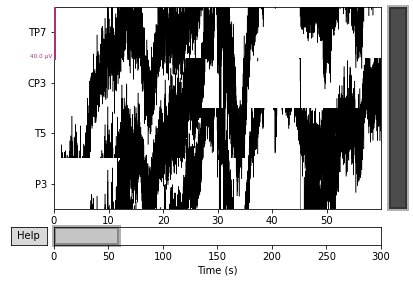

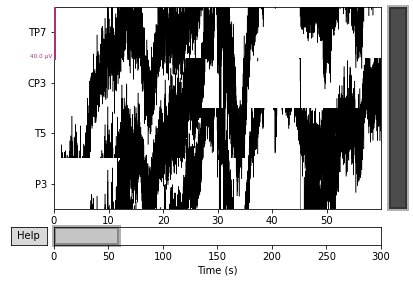

In [ ]:
df2.pick_channels(ch_names=["TP7", "CP3", "T5", "P3"]).plot(duration =60, block=True)

In [ ]:
df1.pick_channels(df1.info, meg=False, eeg=True, stim=False, eog=False, exclude='bads')

TypeError: ignored

In [ ]:
df1.to_data_frame().head()

,time,HEOL,HEOR,FP1,FP2,VEOU,VEOL,F7,F3,FZ,F4,F8,FT7,FC3,FCZ,FC4,FT8,T3,C3,CZ,C4,T4,TP7,CP3,CPZ,CP4,TP8,A1,T5,P3,PZ,P4,T6,A2,O1,OZ,O2,FT9,FT10,PO1,PO2
0,0,13901.937195,0.0,3982.970822,465.794641,4216.181852,5819.295923,3430.592587,17273.866260,17614.114689,26667.307860,4839.332764,6150.321317,7722.566455,28826.062737,12963.948257,6104.080658,2611.561978,8648.320755,14387.620966,7109.767929,3696.429319,8674.358575,5016.515423,21274.342027,5249.287260,2095.260241,0.0,14180.635982,4429.691976,8170.228734,2982.867566,15946.878565,0.0,11340.317638,7828.411762,3845.817390,0.0,0.0,0.0,0.0
1,1,13904.635090,0.0,3989.872413,472.570748,4221.577641,5818.982214,3433.415965,17277.254314,17618.757578,26672.389941,4840.399373,6149.568416,7719.429368,28829.074340,12966.332442,6107.782421,2616.518575,8651.646067,14389.314993,7112.654049,3698.311571,8670.154879,5018.899609,21276.788954,5251.169512,2101.408931,0.0,14178.440021,4430.444877,8175.122589,2987.510455,15952.901771,0.0,11323.816561,7818.812276,3843.370462,0.0,0.0,0.0,0.0
2,2,13908.901528,0.0,3994.766269,475.519610,4225.404887,5819.044956,3436.176602,17280.454142,17622.208373,26675.338802,4839.144539,6149.191966,7714.159062,28834.909322,12964.826641,6110.919507,2612.816813,8654.406703,14388.687575,7115.038235,3704.397519,8667.456984,5019.025093,21280.051525,5250.981287,2106.177303,0.0,14174.236325,4431.574228,8180.079187,2989.455448,15954.909507,0.0,11298.845351,7809.714725,3844.123363,0.0,0.0,0.0,0.0
3,3,13908.650561,0.0,3996.083845,472.696232,4224.840211,5815.656902,3435.172734,17278.885599,17622.145631,26673.268325,4832.054722,6151.638893,7706.755538,28838.673826,12962.567938,6109.852898,2597.005896,8652.838160,14385.738714,7112.528565,3705.275903,8664.759090,5015.762523,21279.800558,5247.091300,2104.044084,0.0,14170.911013,4428.876333,8177.318550,2985.690944,15949.011784,0.0,11271.113504,7798.923146,3843.119495,0.0,0.0,0.0,0.0
4,4,13910.846521,0.0,3998.091581,473.888325,4226.220529,5815.280452,3434.796284,17278.446407,17624.153367,26673.142842,4825.404099,6158.728709,7704.496835,28841.810913,12965.516800,6109.539189,2589.476888,8653.779286,14386.679840,7112.089373,3705.715095,8667.268759,5017.770258,21282.749419,5244.832597,2101.973607,0.0,14176.244061,4430.695844,8178.949835,2986.192878,15945.247279,0.0,11267.098033,7802.185717,3850.836729,0.0,0.0,0.0,0.0


In [ ]:
df2.to_data_frame().head()

,time,HEOL,HEOR,FP1,FP2,VEOU,VEOL,F7,F3,FZ,F4,F8,FT7,FC3,FCZ,FC4,FT8,T3,C3,CZ,C4,T4,TP7,CP3,CPZ,CP4,TP8,A1,T5,P3,PZ,P4,T6,A2,O1,OZ,O2,FT9,FT10,PO1,PO2
0,0,14320.989243,0.0,7114.599042,-60.922225,3595.164158,8589.908200,6347.393107,19879.906966,19476.414868,23696.423965,4692.705329,11059.297407,10824.706059,31265.712362,17025.095281,8612.746191,5123.427340,12847.248629,15544.704043,10681.152970,11598.437136,10386.517782,12330.005766,29354.159921,9328.943096,2398.742013,0.0,12330.570442,11212.700949,15965.763827,8152.033631,21344.675512,0.0,21945.992300,15945.686472,9935.090998,0.0,0.0,0.0,0.0
1,1,14318.605057,0.0,7111.022764,-67.949299,3593.093681,8587.963206,6346.765689,19876.393429,19472.524880,23694.290746,4692.266137,11059.422890,10824.266867,31260.881248,17022.962062,8615.381344,5119.223644,12843.044933,15543.010016,10678.015883,11595.551016,10384.196338,12324.923685,29348.136714,9325.994235,2395.291218,0.0,12323.104175,11206.615000,15963.693350,8147.014292,21341.287458,0.0,21933.004761,15939.663265,9933.083263,0.0,0.0,0.0,0.0
2,2,14317.224739,0.0,7105.313266,-77.862493,3590.772237,8588.088689,6343.628603,19870.809414,19466.501674,23689.710600,4689.191792,11060.426758,10822.886549,31252.536597,17018.632882,8614.189251,5113.765113,12836.896243,15537.614227,10672.369127,11591.786512,10380.369092,12319.214187,29340.544964,9319.657320,2389.958170,0.0,12313.692915,11197.893899,15958.674011,8141.681245,21336.581828,0.0,21918.950612,15932.510707,9931.012786,0.0,0.0,0.0,0.0
3,3,14318.605057,0.0,7104.121173,-81.187805,3590.584012,8591.163034,6343.189410,19869.805547,19463.741038,23689.271408,4690.509368,11062.936427,10825.898152,31249.713219,17016.687888,8617.953755,5111.631894,12837.021727,15533.849723,10672.682835,11593.919731,10381.498443,12317.582902,29339.666580,9318.214260,2389.832687,0.0,12311.685179,11196.827290,15957.481918,8142.371404,21335.326993,0.0,21928.110906,15940.541649,9938.228085,0.0,0.0,0.0,0.0
4,4,14320.926502,0.0,7104.685848,-80.121196,3589.956594,8593.923671,6345.134404,19872.566183,19463.803779,23692.722203,4695.716932,11062.371752,10833.552644,31251.030796,17019.511266,8625.984697,5112.823987,12838.213820,15535.167299,10676.070889,11600.444871,10384.635530,12318.210320,29342.238991,9321.790539,2392.342356,0.0,12317.143710,11199.776151,15957.983852,8144.881073,21337.397470,0.0,21951.325348,15955.474182,9947.451120,0.0,0.0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


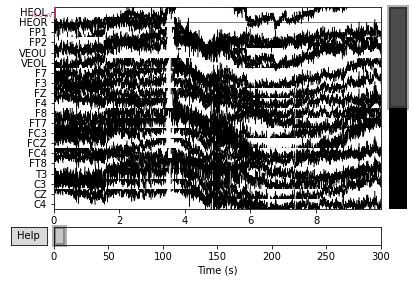

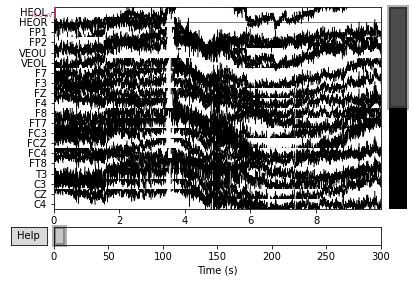

In [ ]:
df1.plot()

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


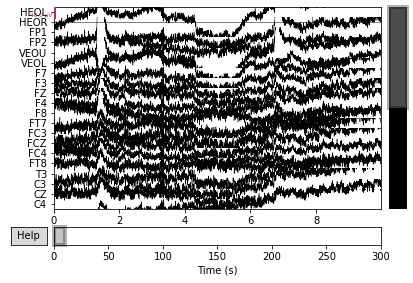

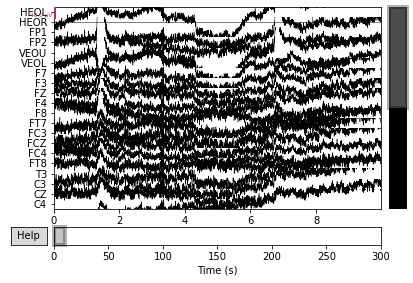

In [ ]:
df2.plot()